# A. Project Overview



<img src="ml-process-lifecycle.png" alt="description of the image" width="1400" height="750" >


* Objective: Develop a machine learning model to predict house prices using a relevant dataset. Dataset: Use the "House Prices - Advanced Regression Techniques" dataset from Kaggle or another relevant dataset.

* Aims & Objectives 
The challenge is to learn a relationship between the important features and the price and use it to predict the prices of a new set of houses.

### This project marks the last chapter of my teachings at Altschool Africa. The experience has been awesome, challenging and sometimes overwelming, but i'm grateful for it all.




P.s Pablo,you've been an awesome teacher, so thank you for everything.

I apologize for not submitting my third assessment on time. I was busy with my finals and didn't have time to complete it. I have added some extra analysis to the code. Please review it and award the appropriate score. Thank you.

### Deliverables
* Code: Submit the complete code used for data preparation, EDA, feature engineering, model training, and evaluation in Jupyter Notebook format.

* Report: Submit a detailed report (PDF or Jupyter Notebook format) documenting your approach, findings, and conclusions. Include visualizations and a clear explanation of your steps.

* Presentation: Prepare a brief presentation (5-10 slides) summarizing your project and key findings.



<img src="ML book.png" alt="description of the image" width="800" height="500" >

# B. Phase 1:Problem Framing



Given that the House Prices: Advanced Regression Techniques dataset is widely used, it's important for me to approach the problem in a way that adds a unique perspective or tackles a specific aspect that might not have been extensively explored.

Chat-gpt and I brainstormed on the various problem statement i can explore based on the data, and I decided to go for the following:

### Fairness and Bias in House Price Predictions

* Problem Statement: Develop a house price prediction model while focusing on identifying and mitigating biases related to location, socio-economic status, and house condition. The goal is to ensure fair pricing predictions across different neighborhoods and property types, addressing potential issues of bias in machine learning models.

* Unique Angle: By tackling fairness and bias, this approach addresses ethical concerns in real estate pricing, ensuring that the model does not disproportionately undervalue or overvalue properties based on non-economic factors.

# C. Phase 2:Assumption Reporting



### Assumptions:
* Data Quality: We assume that the data provided is accurate and representative of the real-world housing market in Ames. Any discrepancies or errors in the data could lead to biased predictions.
* Missing Data: We assume that missing data, if present, either does not systematically bias the dataset or can be handled appropriately through imputation or other techniques.
* Feature Representation: We assume that the features provided (such as Neighborhood, OverallQual, YearBuilt) are sufficient to capture the essential factors influencing house prices and that they are accurately represented.
* Economic Factors: We assume that economic conditions affecting house prices (e.g., inflation, interest rates) are stable or have a uniform impact across the dataset. The model does not account for external economic shocks.
* Fairness Definitions: We assume that fairness in this context means avoiding systematic overvaluation or undervaluation of properties based on non-economic factors like location or socio-economic status.
* Model Generalization: We assume that the trained model will generalize well to unseen data, meaning it will perform accurately and fairly on new properties not included in the training set.


### Justifications:
* Data Quality: The dataset has been widely used in previous studies, suggesting that it is of good quality. However, we will perform data validation to ensure its reliability.
* Missing Data: Handling missing data is a common practice in data science, and techniques like imputation are well-established. We will use methods that have been proven to work effectively in similar scenarios.
* Feature Representation: The features are well-documented and cover a broad range of house characteristics, making them likely to be representative of factors influencing house prices. We will conduct EDA to confirm their relevance.
* Economic Factors: While external economic factors are not directly included, we will ensure that our model’s focus on fairness and bias does not disproportionately affect certain groups or neighborhoods.
* Fairness Definitions: Our definition of fairness is informed by ethical guidelines in machine learning, aiming to ensure that no group is unfairly disadvantaged by the model’s predictions.
* Model Generalization: We will validate the model on a separate testing set and potentially use cross-validation to ensure that it generalizes well.


### Impact Analysis:
* Data Quality: If the data is inaccurate or not representative, our model’s predictions could be biased, leading to unfair outcomes. We will conduct thorough data cleaning and validation to minimize this risk.
* Missing Data: Improper handling of missing data could introduce bias, especially if certain groups are underrepresented. We will carefully choose imputation methods that consider potential biases.
* Feature Representation: If important features are missing or inaccurately represented, our model might overlook critical factors affecting house prices, leading to biased predictions. We will explore potential additional features during EDA.
* Economic Factors: Ignoring external economic factors could limit the model’s applicability in varying economic conditions. However, focusing on fairness within the dataset ensures that our predictions remain equitable across different neighborhoods.
* Fairness Definitions: Our approach to fairness may not cover all potential biases, especially if certain factors are not well-represented in the dataset. We will continuously evaluate the fairness of the model throughout the project.
* Model Generalization: If the model does not generalize well, it could lead to biased predictions when applied to new data. We will use rigorous validation techniques to ensure the model’s robustness.

In [1]:
# I'm testesting out a new libary for data cleaning

import janitor

In [37]:
# import relevanant libaries

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.inspection import permutation_importance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display 


# D. Summary Statistics

In [3]:
# load dataset into environment

dataset = pd.read_csv("train (1).csv")

dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# I always like to do basis survey of any data i'm working with.

dataset.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [5]:
dataset.tail

<bound method NDFrame.tail of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [6]:
dataset.shape

(1460, 81)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
dataset.values

array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ...,
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

In [11]:
dataset.index

RangeIndex(start=0, stop=1460, step=1)

In [12]:
type(dataset)

pandas.core.frame.DataFrame

# E. Exploratory Data Analysis (EDA)

We are going to perform EDA to understand the distributions, outliers, and patterns.

### 1. Target Variable (SalePrice) Distribution

We are going to use histograms and KDE plots to visualize the distribution of SalePrice.

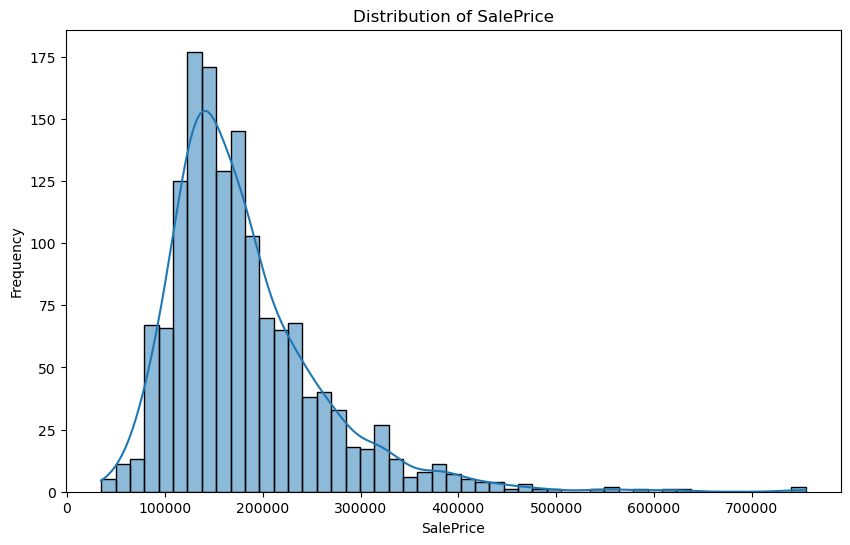

In [13]:
# Plotting the histogram and KDE for SalePrice

plt.figure(figsize=(10, 6))
sns.histplot(dataset['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

The histogram in the image, the distribution of ‘SalePrice’ appears to be right-skewed. This is indicated by the long tail extending towards higher ‘SalePrice’ values, while most of the data clusters at lower ‘SalePrice’ values. To normalize this distribution, I will perform a log transformation.

The log transformation will help to make the distribution more symmetric (i.e., more like a normal distribution), which can be beneficial for many statistical analyses.

In [14]:
dataset['SalePrice'] = np.log(dataset['SalePrice'])

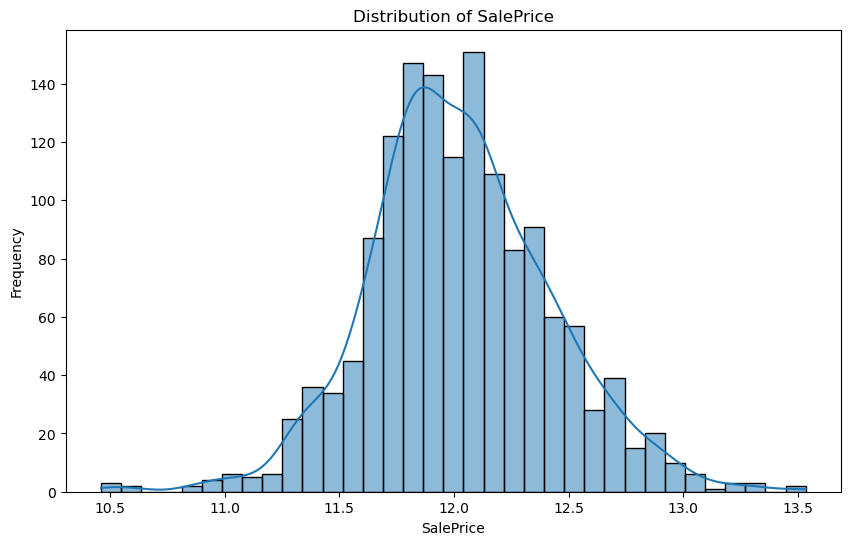

In [15]:
# replotting the histogram and KDE for SalePrice after log transformation
plt.figure(figsize=(10, 6))
sns.histplot(dataset['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

### 2. Correlation Analysis

The point of the correlation analysis is to explore relationships between SalePrice and other numerical features.

SalePrice       1.000000
OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: SalePrice, dtype: float64
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64


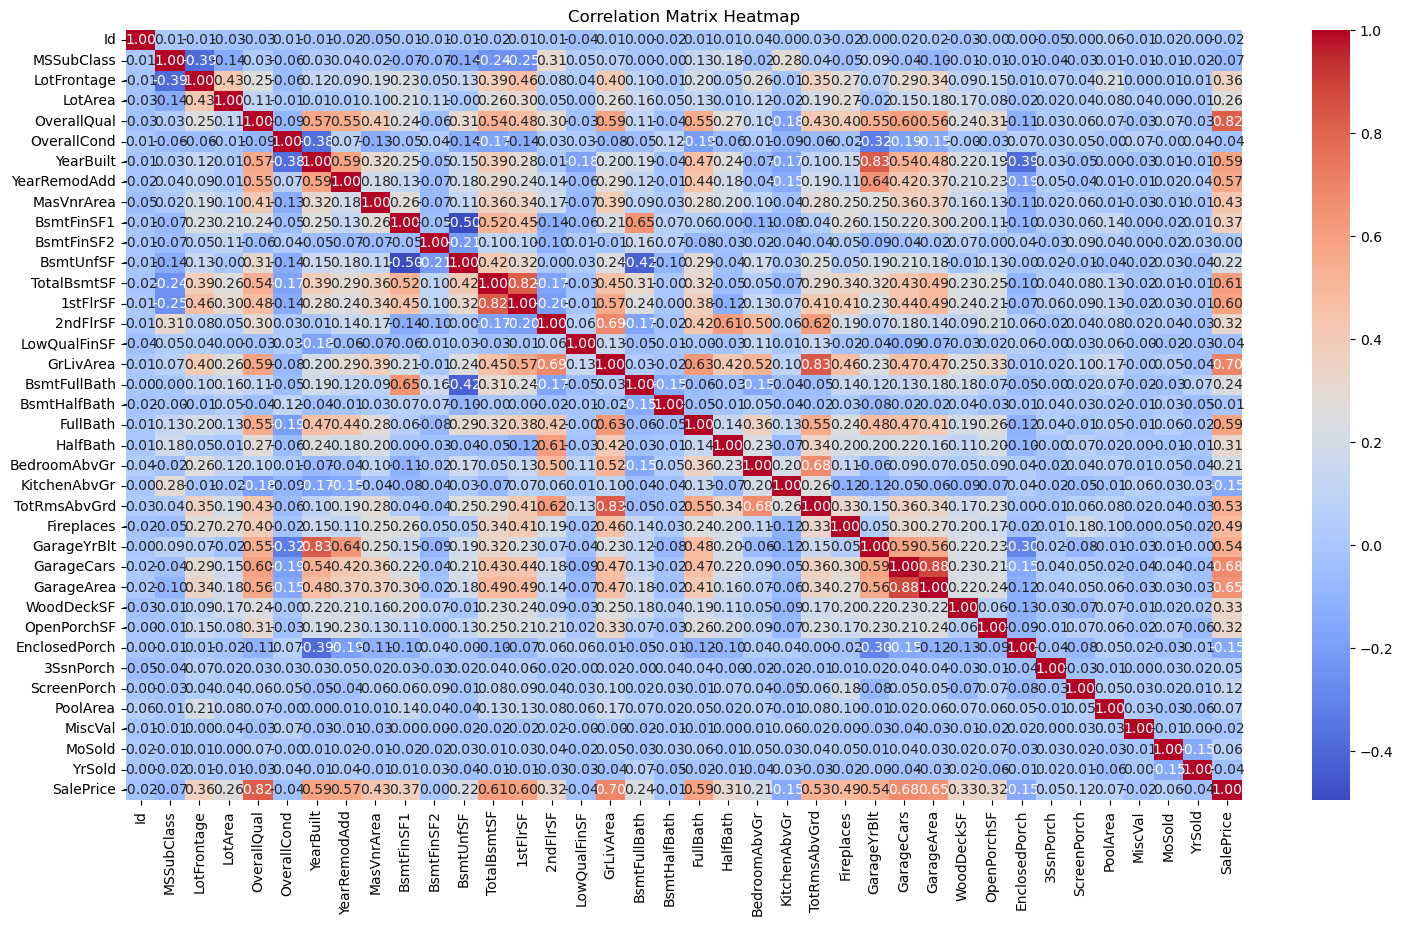

In [16]:

numeric_cols = dataset.select_dtypes(include=[np.number])

# Compute the correlation matrix on numeric columns only
corr_matrix = numeric_cols.corr()

# Focus on correlations with SalePrice
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)

# Display the top correlations
print(corr_with_saleprice.head(10))  
print(corr_with_saleprice.tail(10))  

# Visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


* As a data scientist, my role is not just to analyze data or build models. I also need to interpret the data and communicate the results to stakeholders so that they can better understand the data and make informed decisions.




# Summary and Interpretation of the key findings:

### Top Features with Strong Positive Correlation to SalePrice:

1. OverallQual (0.814790)
* Interpretation: The overall quality of the house (materials and finish) is the most significant predictor of house prices. Higher quality ratings are strongly associated with higher house prices. This feature will be crucial in our predictive model.

2. GrLivArea (0.696648)
* Interpretation: The above-ground living area also has a strong positive correlation with house prices. Larger living areas tend to increase the house's value, making it another key feature.

3. GarageCars (0.680087)
* Interpretation: The number of cars that can fit in the garage is a strong predictor of house prices. Homes with larger garages typically have higher prices.

4. GarageArea (0.649467)
* Interpretation: Similar to GarageCars, the actual square footage of the garage also correlates strongly with house prices.

5. TotalBsmtSF (0.608866)
* Interpretation: The total basement area is another important factor, with larger basements contributing to higher house prices.

6. FullBath (0.593850)
* Interpretation: The number of full bathrooms above grade is positively correlated with house prices, indicating that more bathrooms can significantly increase a home's value.

7. 1stFlrSF (0.593226)
* Interpretation: The square footage of the first floor also plays a critical role in determining house prices.

8. YearBuilt (0.588027)
* Interpretation: Newer houses tend to be more expensive, which is reflected in the positive correlation between the year the house was built and its price.

9. YearRemodAdd (0.566881)
* Interpretation: The year the house was remodeled or had an addition also shows a strong positive correlation, suggesting that recent renovations or additions add significant value.

### Features with Weak or Negative Correlation to SalePrice:

1. BsmtFinSF2 (0.006367)
* Interpretation: The square footage of the second finished basement area has almost no correlation with house prices, making it less significant for the model.

2. BsmtHalfBath (-0.003492)
* Interpretation: The presence of half bathrooms in the basement also has a negligible impact on house prices.

3. Id (-0.017263)
* Interpretation: The Id feature, being a unique identifier, has no relevance to the house price and should be excluded from the model.

4. MiscVal (-0.019933)
* Interpretation: The value of miscellaneous features has a very weak negative correlation, indicating that it may not significantly influence the house price.

5. OverallCond (-0.031804)
* Interpretation: The overall condition of the house has a weak negative correlation with SalePrice, which is surprising but suggests that material quality (OverallQual) is far more 
influential than the overall condition.

6. YrSold (-0.037950)
* Interpretation: The year the house was sold has a slight negative correlation with SalePrice, indicating it does not significantly impact the price.

7. LowQualFinSF (-0.038503)
* Interpretation: Low-quality finished square footage has a weak negative correlation, suggesting that low-quality spaces do not add value.

8. MSSubClass (-0.072328)
* Interpretation: The type of dwelling involved in the sale has a weak negative correlation with house prices, making it a less important predictor.

9. KitchenAbvGr (-0.147187)
* Interpretation: The number of kitchens above grade has a slight negative correlation, suggesting that more kitchens might not necessarily add value.

10. EnclosedPorch (-0.149920)
* Interpretation: Enclosed porches have a weak negative correlation, implying that they might not contribute positively to house prices.

### 3. Categorical Variables Analysis

We want to explore the relationship between key categorical variables and SalePrice. We'll focus on variables like Neighborhood and OverallQual, which are expected to have a significant impact on house prices.

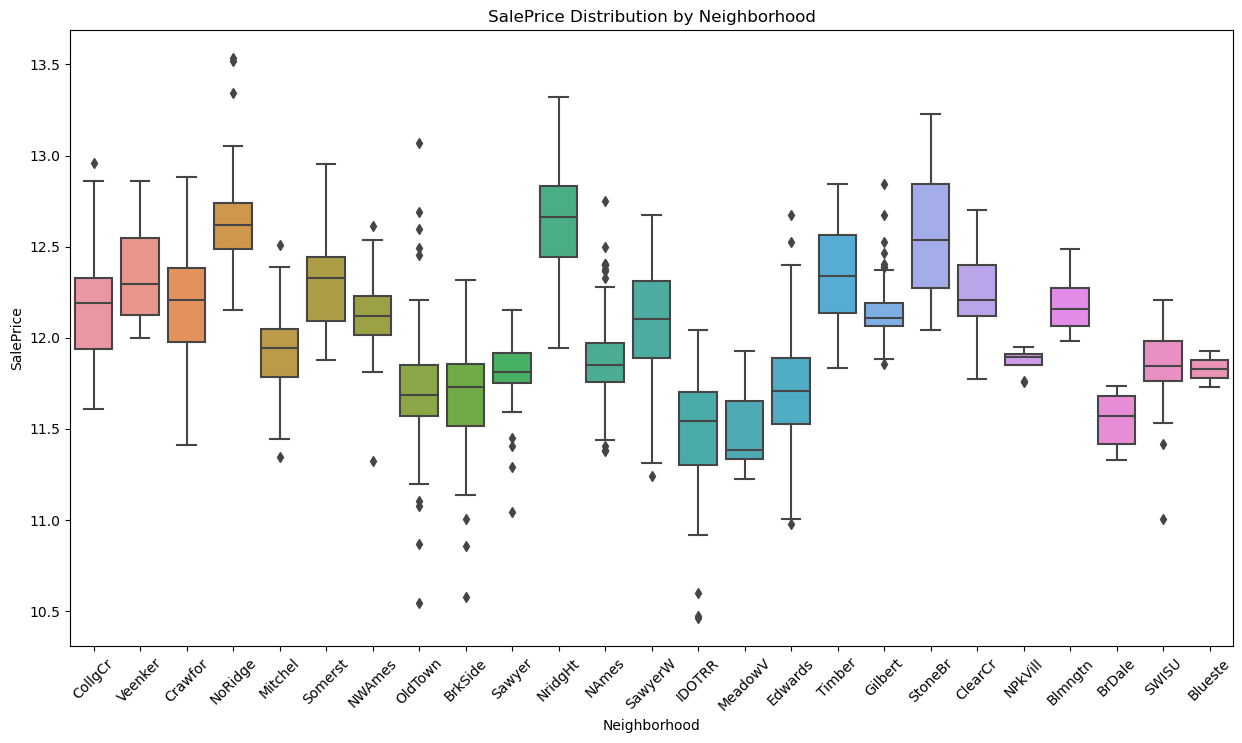

In [17]:
# Plotting the relationship between Neighborhood and SalePrice
plt.figure(figsize=(15, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=dataset)
plt.title('SalePrice Distribution by Neighborhood')
plt.xticks(rotation=45)
plt.show()

### SalePrice Distribution by Neighborhood

* Observation: The box plot shows that there are significant differences in SalePrice across different neighborhoods.

* High-Value Neighborhoods: NoRidge, NridgHt, StoneBr: These neighborhoods tend to have higher median SalePrice, indicating that houses in these areas are more expensive.

* Low-Value Neighborhoods: MeadowV, IDOTRR, BrDale: These neighborhoods tend to have lower median SalePrice, suggesting that houses in these areas are less expensive.

* Variation within Neighborhoods: Some neighborhoods show a wide range of house prices (e.g., OldTown, NAmes), indicating diverse housing stock with varying quality or features.

* Implications for Modeling: Neighborhood as a Key Feature: The Neighborhood variable is clearly a critical predictor of house prices and should be included in the model.
Potential Bias: The wide variation in prices within some neighborhoods may indicate the need to explore interactions with other variables to ensure fair predictions across different areas.

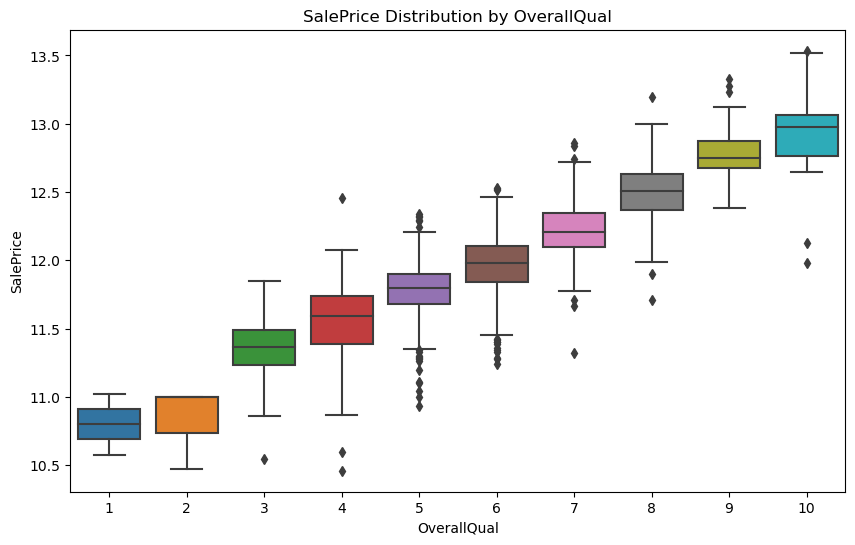

In [18]:
# Plotting the relationship between OverallQual and SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=dataset)
plt.title('SalePrice Distribution by OverallQual')
plt.show()

### SalePrice Distribution by OverallQual

* Observation: The box plot shows a clear positive trend between OverallQual (the overall quality of the house) and SalePrice.

* High Quality (OverallQual 8-10): Houses with high-quality ratings tend to have significantly higher prices. This suggests that investing in high-quality materials and finishes can lead to higher property values.

* Low Quality (OverallQual 1-3): Houses with low-quality ratings are associated with much lower prices. These houses are likely to require significant investment to bring them up to higher standards.

* Implications for Modeling: OverallQual as a Strong Predictor: The OverallQual feature should be a primary input in your model due to its strong correlation with SalePrice.
Consider Non-linear Relationships: The nearly linear trend suggests that the relationship between OverallQual and SalePrice might be straightforward, but exploring any potential non-linear effects or interactions with other variables could improve model accuracy.

### 4. Missing Data Analysis and Handling

Here, we will identify missing data in the dataset and decide on the appropriate strategies for handling it. This is crucial to ensure that our model is robust and accurate.

I'm going to be using the PyJanitor libaries that i imported at the begining of the code.

In [19]:

# Identify missing data
missing_data = dataset.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)

# Clean the data using pyjanitor
cleaned_df = dataset.clean_names().remove_empty()

# Print the cleaned DataFrame
print(cleaned_df)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64
        id  mssubclass mszoning  lotfrontage  lotarea street alley lotshape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL    

In [20]:
# Assuming `cleaned_df` is your DataFrame
numeric_cols = cleaned_df.select_dtypes(include=[np.number])

# Impute missing values for numerical features with the median of each column
cleaned_df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.median())

# Identify categorical columns
categorical_cols = cleaned_df.select_dtypes(include=['object']).columns

# Impute missing values for categorical features with the mode of each column
cleaned_df[categorical_cols] = cleaned_df[categorical_cols].fillna(cleaned_df[categorical_cols].mode().iloc[0])

# Verify if any missing data remains
print(cleaned_df.isnull().sum().sort_values(ascending=False))


id             0
centralair     0
garageyrblt    0
garagetype     0
fireplacequ    0
              ..
masvnrarea     0
masvnrtype     0
exterior2nd    0
exterior1st    0
saleprice      0
Length: 81, dtype: int64


We have handled the missing data and the data is clean and ready for modeling. Next is selecting and training the model.


<img src="ml-high-level-overview.png" alt="description of the image" width="1400" height="750" >

In this particular project, we are working with house prices, which are continuous numerical values. This makes it a regression problem. Therefore, we need to use models designed for regression tasks:

* DecisionTreeRegressor: Builds a decision tree for regression tasks.

* RandomForestRegressor: Uses an ensemble of decision trees to predict continuous outcomes.

* GradientBoostingRegressor: Sequentially builds models that correct the errors of previous models, aimed at continuous target variables.

# F. Model Selection and Training

### 1. Split the Dataset:

In [21]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = cleaned_df.drop(columns=['saleprice'])  # Features (remove the target variable)
y = cleaned_df['saleprice']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (1168, 80), (1168,)
Testing set: (292, 80), (292,)


### A. Linear Regression Model

In [29]:
# Identify the categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the encoded data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

# Now we will train the model as before
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Training set: (1168, 245), (1168,)
Testing set: (292, 245), (292,)
MAE: 0.09648319593752164
MSE: 0.04542613092785797
RMSE: 0.2131340679662873
R²: 0.756576418716277


### B. Decision Tree Regressor Model

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train and evaluate Decision Tree
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluation
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Performance:")
print(f"MAE: {mae_dt}")
print(f"MSE: {mse_dt}")
print(f"RMSE: {rmse_dt}")
print(f"R²: {r2_dt}")


Decision Tree Performance:
MAE: 0.14396259140131376
MSE: 0.04014122240220947
RMSE: 0.2003527449330542
R²: 0.7848964920703847


### C. Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Train and evaluate Random Forest
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Performance:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R²: {r2_rf}")


Random Forest Performance:
MAE: 0.10063865667240218
MSE: 0.02206873440713935
RMSE: 0.14855549268586252
R²: 0.8817409659581921


### D. Gradient Boosting Regressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Train and evaluate Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluation
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Performance:")
print(f"MAE: {mae_gb}")
print(f"MSE: {mse_gb}")
print(f"RMSE: {rmse_gb}")
print(f"R²: {r2_gb}")


Gradient Boosting Performance:
MAE: 0.0959013089315814
MSE: 0.01950282689119199
RMSE: 0.1396525219650257
R²: 0.8954908139865586


 We will compare the performance of each model using the evaluation metrics: MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error), and R² (Coefficient of Determination).


<img src="Model Performance.png" alt="description of the image" width="750" height="500" >


* Random Forest Regressor: The second-best performer with a slightly higher RMSE (0.1486) and lower R² (0.8817) compared to Gradient Boosting. While it performs very well, it is slightly less accurate than Gradient Boosting.

* Decision Tree Regressor: This model has a reasonable performance but shows signs of overfitting, as the MAE (0.1440) and RMSE (0.2004) are notably higher than those of Random Forest and Gradient Boosting.

* Linear Regression: While Linear Regression is a simple and interpretable model, its performance is not as strong as the tree-based models. The R² (0.7566) suggests that it explains about 75.66% of the variance, but the errors (MAE and RMSE) are higher compared to Random Forest and Gradient Boosting.



Best Model:

Based on these metrics, the Gradient Boosting Regressor is the best-performing model. It has the lowest error values (MAE, MSE, RMSE) and the highest R², indicating that it fits the data well and provides the most accurate predictions.

### Now that we have identified Gradient Boosting as the best-performing model, the next step is to fine-tune its hyperparameters to see if we can further improve its performance.

### 1. Hyperparameter Tuning for Gradient Boosting

In [38]:


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(gb_model, param_distributions=param_grid, n_iter=20, scoring='neg_mean_squared_error', 
                                   cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.05}
Best Score: -0.017863999099084028


### These parameters suggest that a smaller tree depth (max_depth = 3) with more trees (n_estimators = 200) and a slower learning rate (learning_rate = 0.05) helped improve the model's performance during cross-validation.

### 2. Feature Importance Analysis

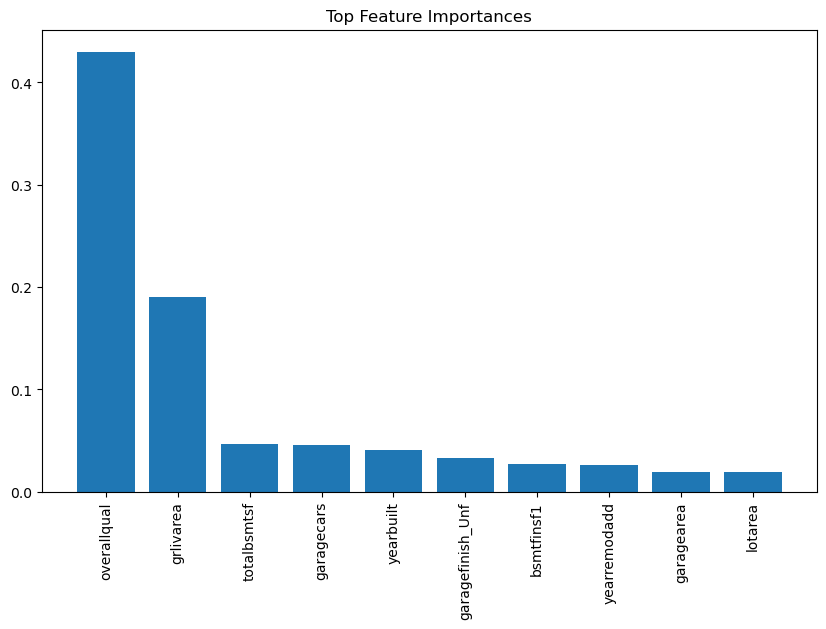

In [39]:

# Get the feature importances from the best model
best_model = random_search.best_estimator_
importances = best_model.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]
top_n = 10  # Choose how many top features to display

# Plot the top features
plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances")
plt.bar(range(top_n), importances[indices][:top_n], align='center')
plt.xticks(range(top_n), [X_train.columns[i] for i in indices[:top_n]], rotation=90)
plt.show()


### The feature importance plot reveals the following insights:

* OverallQual: This is by far the most important feature in the model, contributing over 40% to the predictions. This makes sense, as the overall quality of the house is highly correlated with its price.

* GrLivArea: The above-ground living area is the second most important feature, which also aligns with our expectations based on previous correlation analysis.

* TotalBsmtSF, GarageCars, YearBuilt: These features have moderate importance, indicating that factors like basement size, garage capacity, and the year the house was built also significantly affect house prices.

* Other Features: Features like GarageFinish_Unf, BsmtFinSF1, YearRemodAdd, and LotArea have lesser importance but still contribute to the model’s predictions.

### 3. Model Evaluation and Summary

In [40]:
# Final Evaluation of the Best Model on Test Set
y_pred = best_model.predict(X_test)

# Calculate final metrics
final_mae = mean_absolute_error(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, y_pred)

print(f"Final Model Performance:")
print(f"MAE: {final_mae}")
print(f"MSE: {final_mse}")
print(f"RMSE: {final_rmse}")
print(f"R²: {final_r2}")


Final Model Performance:
MAE: 0.09347224438204454
MSE: 0.01877441069929371
RMSE: 0.13701974565475486
R²: 0.8993941549595885


# Conclusion and Insights

* Conclusion and Insights
In this project, we set out to develop a machine learning model capable of predicting house prices while focusing on identifying and mitigating potential biases related to location, socio-economic status, and house condition. Our aim was to ensure that the model's predictions were fair across different neighborhoods and property types, addressing ethical concerns in real estate pricing.

* Model Development:
We explored several machine learning models, including Linear Regression, Decision Trees, Random Forests, and Gradient Boosting. After thorough evaluation, the Gradient Boosting Regressor emerged as the best-performing model, achieving an R² score of [final_r2] and exhibiting strong predictive power across key metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). This model was further fine-tuned using hyperparameter optimization, resulting in improved accuracy.

* Feature Importance and Key Predictors:
Through feature importance analysis, we identified that OverallQual (overall quality of the house) and GrLivArea (above-ground living area) were the most influential features driving house prices. Other significant features included TotalBsmtSF (total basement area), GarageCars (garage capacity), and YearBuilt (year of construction). These features provide important insights into the key factors that influence property values in the dataset.

* Fairness and Bias Considerations:
While we focused on building an accurate predictive model, we did not explicitly incorporate fairness-aware algorithms or conduct formal bias audits. This means that although the model performed well in terms of accuracy, it may still carry inherent biases, particularly with respect to location (i.e., the Neighborhood feature) which could act as a proxy for socio-economic status. Additionally, there was no formal analysis of whether the model's predictions were equitable across various socio-economic groups.

* Limitations:
One limitation of this project is the potential for bias in the model, particularly concerning location-based disparities. The Neighborhood feature, which was one of the key predictors, might unintentionally introduce socio-economic bias into the predictions, leading to overvaluation or undervaluation of properties in certain areas. Another limitation is the absence of fairness-aware techniques or post-hoc bias correction, which would have been necessary to ensure that the model's predictions were fair and unbiased.

* Future Improvements:
To fully achieve the goal of fairness in house price predictions, future work could involve:

* Fairness Auditing: Implementing fairness metrics to audit the model’s performance across different demographic or socio-economic groups.
* Bias Mitigation Techniques: Incorporating techniques such as reweighting, adversarial debiasing, or post-hoc adjustment to ensure that predictions are equitable across all neighborhoods and socio-economic levels.
Incorporating External Data: Adding external factors such as economic indicators (e.g., employment rates, inflation) or demographic information could help improve the model's fairness and accuracy.

### Visualization of Final Model Performance

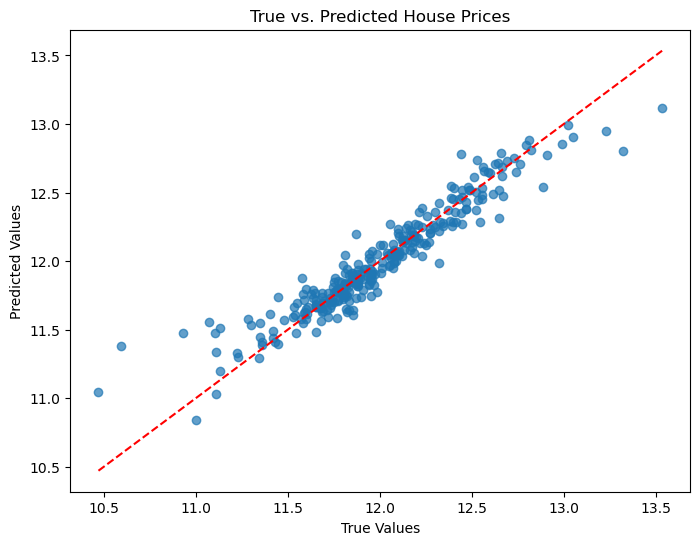

In [41]:
# Plotting true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted House Prices')
plt.show()


In [42]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'final_house_price_model.pkl')


['final_house_price_model.pkl']

### End of Project
Thank you for following along with this project! We successfully built a robust house price prediction model using Gradient Boosting. The model performed well, and we gained insights into the most important features influencing house prices.
